In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv('winemag-data-130k-v2.csv', index_col=0)
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [4]:
# Data Exploration
print(df.info()) # get information about dataset
print(df.shape) # get the shape of the dataset
print(df.head()) # view the first five rows
print(df.tail()) # view the last five rows
print(df.describe()) # get summary statistics

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB
None
(129971, 13)
    country 

In [6]:
# Drop columns that won't be used in analysis
df = df.drop(['taster_twitter_handle', 'region_2'], axis=1)

In [8]:
# Fill missing values with mean for price and mode for variety and winery
df['price'].fillna(df['price'].mean(), inplace=True)
df['variety'].fillna(df['variety'].mode()[0], inplace=True)
df['winery'].fillna(df['winery'].mode()[0], inplace=True)

In [9]:
# Drop rows with missing country or province
df.dropna(subset=['country', 'province'], inplace=True)

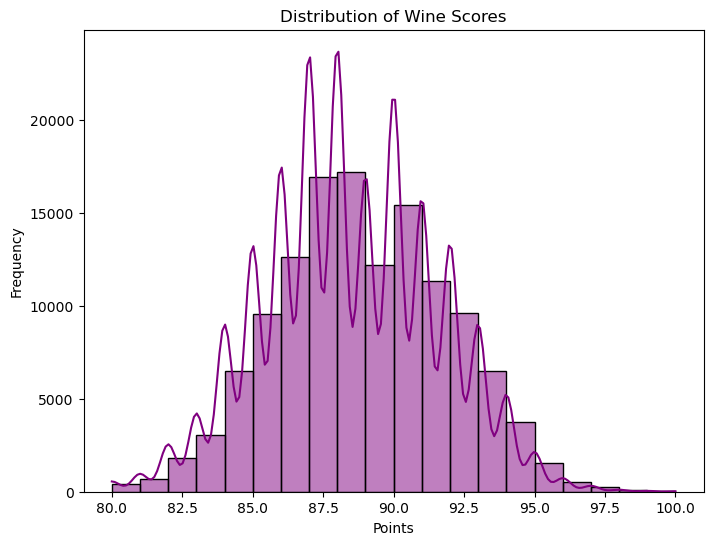

In [10]:
# Visualize the distribution of points using a histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['points'], bins=20, color='purple', kde=True)
plt.title('Distribution of Wine Scores')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.show()

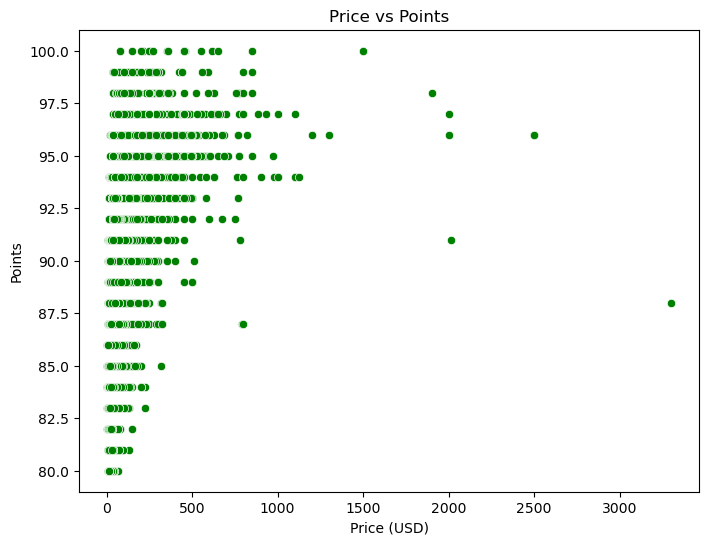

In [11]:
# Visualize the relationship between price and points using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='points', data=df, color='green')
plt.title('Price vs Points')
plt.xlabel('Price (USD)')
plt.ylabel('Points')
plt.show()

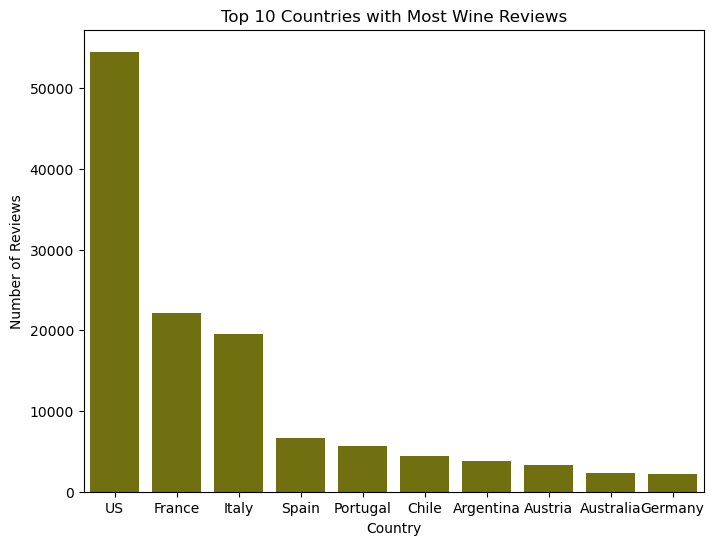

In [13]:
# Visualize the top 10 countries with the most number of reviews using a bar chart
plt.figure(figsize=(8, 6))
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values, color='olive')
plt.title('Top 10 Countries with Most Wine Reviews')
plt.xlabel('Country')
plt.ylabel('Number of Reviews')
plt.show()

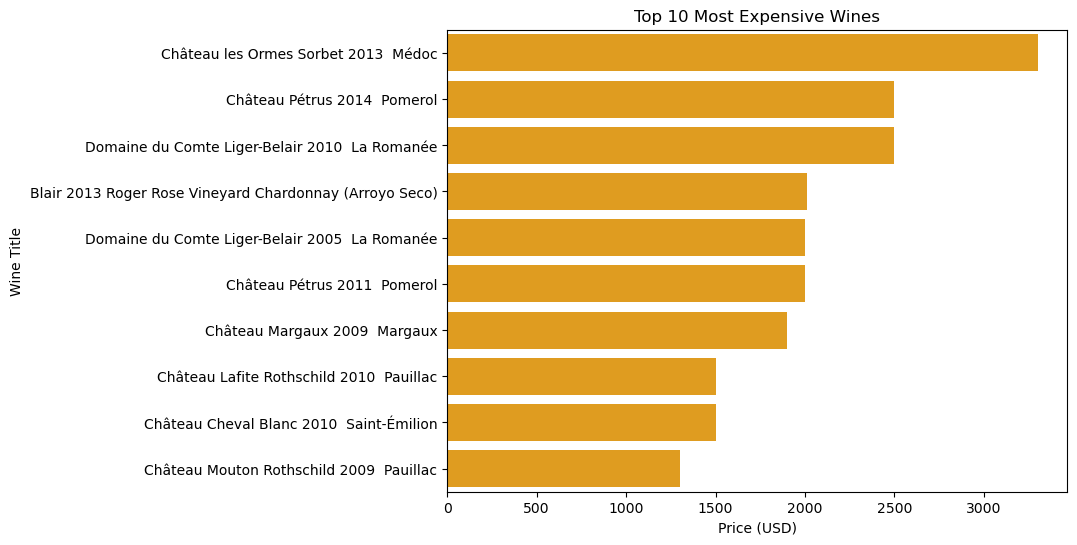

In [14]:
# Visualize the top 10 most expensive wines using a bar chart
plt.figure(figsize=(8, 6))
top_expensive = df.sort_values('price', ascending=False).head(10)
sns.barplot(x='price', y='title', data=top_expensive, color='orange')
plt.title('Top 10 Most Expensive Wines')
plt.xlabel('Price (USD)')
plt.ylabel('Wine Title')
plt.show()

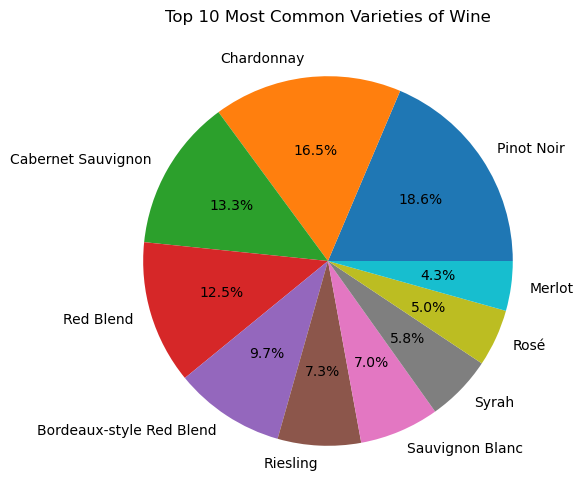

In [15]:
# Visualize the most common varieties of wine using a pie chart
plt.figure(figsize=(8, 6))
top_varieties = df['variety'].value_counts().head(10)
plt.pie(top_varieties.values, labels=top_varieties.index, autopct='%1.1f%%')
plt.title('Top 10 Most Common Varieties of Wine')
plt.show()